# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease Prediction Portfolio Project </div>
##### Personal Key Indicators of Heart Disease
##### 2020 annual CDC survey data of 400k adults related to their health status

by Ameenah Al-Haidari


## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> The second part: Encoding, Feature Engineering and Feature selection</div>

### Table of Contents

## [The part 2: Encoding, Feature Engineering and Feature selection](#Thepart2:Encoding,FeatureEngineeringandFeatureselection)

* [5. Upload Data from part 1 and explor it](#5_UploadDatafrompart1andexplorit)

* [6. Convert variables to the right format before applying encoding](#6_Convertvariablestotherightformatbeforeapplyingencoding)

* [7. Encoding](#7_Encoding)
    * [7.1 Binary Encoding](#7_1BinaryEncoding)
    * [7.2 Target Encoding](#7_2TargetEncoding)
    * [7.3 One Hot Encoding](#7_3OneHotEncoding)
    * [7.4 Label Encoding or Ordinal Encoding](#7_4LabelEncodingorOrdinalEncoding)
    
* [8. Feature Selection Technique](#8_FeatureSelectionTechnique)
    * [8.1 Pearson Correlation Coefficient](#8_1PearsonCorrelationCoefficient)
    * [8.2 Baseline model](#8_2Baselinemodel)
    * [8.3 Scaling](#8_3Scaling)
    * [8.4 PCA](#8_4PCA)

### Importing the libraries and packages

In [101]:
import sys
import os

import pandas as pd
import numpy as np

import category_encoders as ce
from category_encoders import TargetEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix

from scipy.stats import skew

import statsmodels.api as sm

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, SelectKBest

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 5. Upload Data from part 1 and explor it<a class="anchor" id="5_UploadDatafrompart1andexplorit"></a></div>

In [54]:
HD = pd.read_csv('HD1.csv')

In [55]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        301717 non-null  int64  
 1   HeartDisease      301717 non-null  object 
 2   BMI               301717 non-null  float64
 3   Smoking           301717 non-null  object 
 4   AlcoholDrinking   301717 non-null  object 
 5   Stroke            301717 non-null  object 
 6   PhysicalHealth    301717 non-null  float64
 7   MentalHealth      301717 non-null  float64
 8   DiffWalking       301717 non-null  object 
 9   Sex               301717 non-null  object 
 10  AgeCategory       301717 non-null  object 
 11  Race              301717 non-null  object 
 12  Diabetic          301717 non-null  object 
 13  PhysicalActivity  301717 non-null  object 
 14  GenHealth         301717 non-null  object 
 15  SleepTime         301717 non-null  float64
 16  Asthma            30

Note:
- I'll drop "Unnamed: 0" column, and all numerical columns "BMI", "PhysicalHealth", "MentalHealth", "SleepTime" because I extracted catecorical feautres (BMI_category, PH_Categorical, Mnt_Categorical, ST_Categorical) from these columns. Please look at the first Notebook (1-AmeenahPortfolio_DataAnalysis).

In [56]:
HD1 = HD.drop(HD.columns[[0, 2, 6, 7, 15]], axis=1)
HD1.head(2)

HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0           No     Yes              No     No          No  Female   
1           No      No              No    Yes          No  Female   

   AgeCategory   Race Diabetic PhysicalActivity  GenHealth Asthma  \
0        55-59  White      Yes              Yes  Very good    Yes   
1  80 or older  White       No              Yes  Very good     No   

  KidneyDisease SkinCancer                        BMI_category PH_Categorical  \
0            No        Yes            Underweight (BMI < 18.5)          3 - 7   
1            No         No  Normal weight (18.5 <= BMI < 25.0)          0 - 1   

  Mnt_Categorical ST_Categorical  
0            > 15          5 - 7  
1           0 - 1          7 - 9

In [57]:
HD1.shape

(301717, 18)

In [58]:
HD1.dtypes

HeartDisease        object
Smoking             object
AlcoholDrinking     object
Stroke              object
DiffWalking         object
Sex                 object
AgeCategory         object
Race                object
Diabetic            object
PhysicalActivity    object
GenHealth           object
Asthma              object
KidneyDisease       object
SkinCancer          object
BMI_category        object
PH_Categorical      object
Mnt_Categorical     object
ST_Categorical      object
dtype: object

In [59]:
HD1.describe(include="object").T.style.background_gradient(cmap='YlOrRd')

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 6. Convert variables to the right format before applying encoding <a class="anchor" id="6_Convertvariablestotherightformatbeforeapplyingencoding"></a></div>

#### Category Columns

In [60]:
Category_col = ['Sex', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth', 'BMI_category', 'PH_Categorical', 'Mnt_Categorical', 'ST_Categorical']

for column in Category_col:
    HD1[column] = HD1[column].astype('category')

In [62]:
HD1.dtypes

HeartDisease          object
Smoking               object
AlcoholDrinking       object
Stroke                object
DiffWalking           object
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity      object
GenHealth           category
Asthma                object
KidneyDisease         object
SkinCancer            object
BMI_category        category
PH_Categorical      category
Mnt_Categorical     category
ST_Categorical      category
dtype: object

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 7. Encoding <a class="anchor" id="7_Encoding"></a></div>

Encoding is the process of converting categorical data into numeric representation.

The performance of a machine learning model not only depends on the model and the hyperparameters but also on how we process and feed different types of variables to the model. Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information. Chosen the right encoding is not only elevates the model quality but also helps in better feature engineering.
There are two kinds of categorical data-
- Ordinal Data: The categories have an inherent order
- Nominal Data: The categories do not have an inherent order

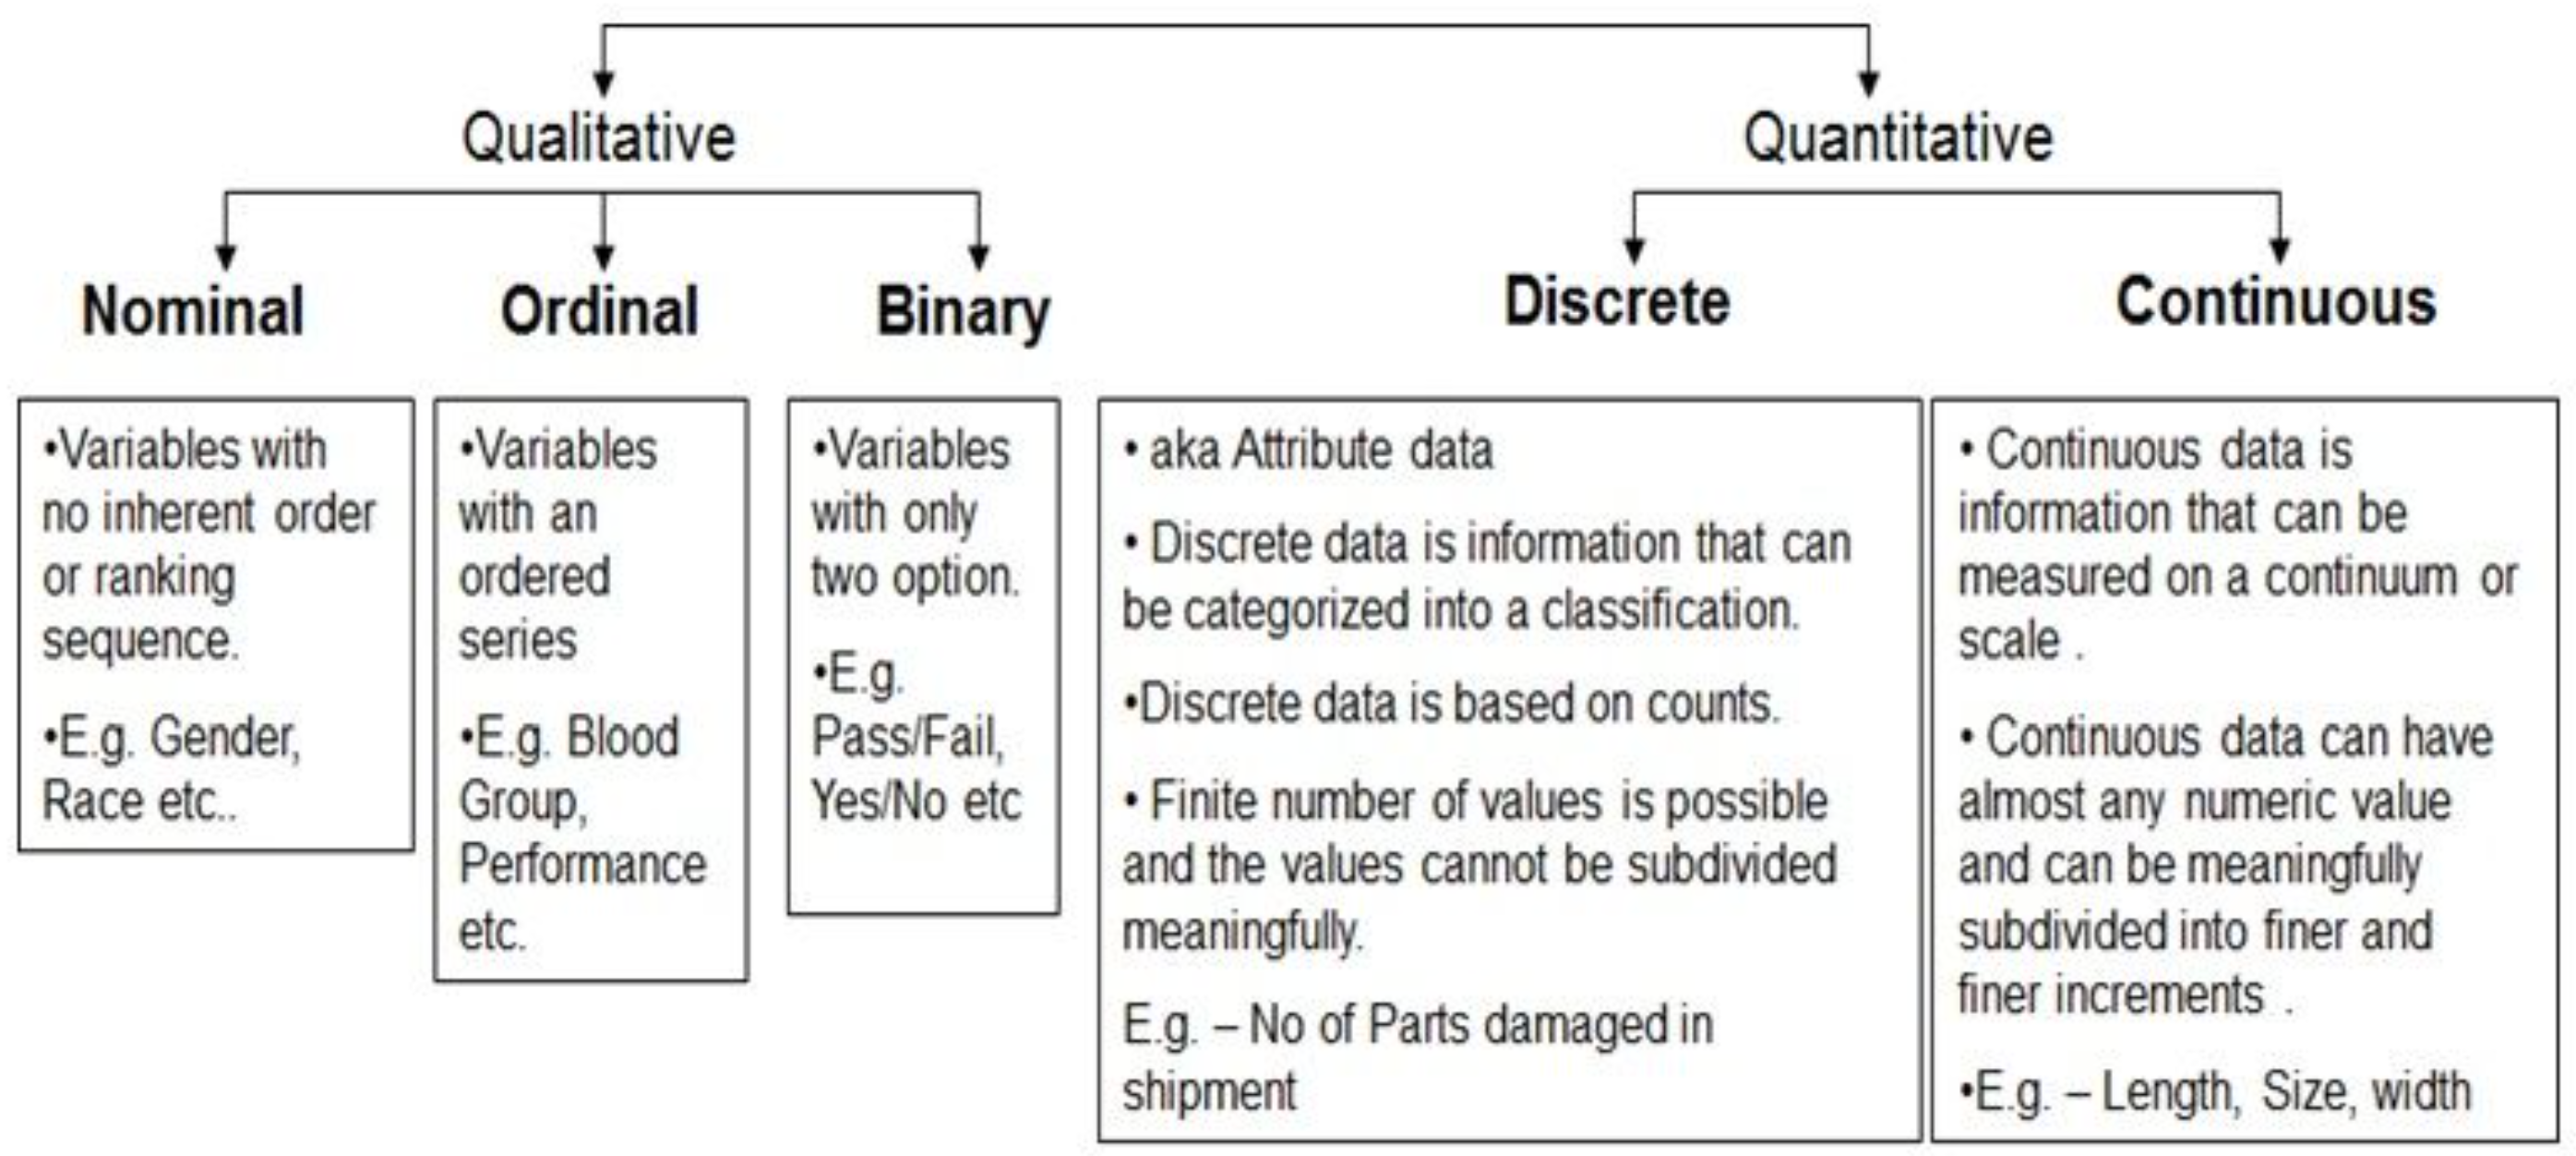

https://www.datacamp.com/tutorial/categorical-data?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720821&utm_adgroupid=143216588577&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=665485585131&utm_targetid=aud-299261629574:dsa-1947282172981&utm_loc_interest_ms=&utm_loc_physical_ms=9000014&utm_content=dsa~page~community-tuto&utm_campaign=230119_1-sea~dsa~tutorials_2-b2c_3-row-p1_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-ltsjul23&gclid=Cj0KCQjwz8emBhDrARIsANNJjS52NFJ7e6zL6PqgYn97jSYu7NNm-nWES0lo1MOkjx2ojM4paJeFF3QaAgJREALw_wcB

https://contrib.scikit-learn.org/category_encoders/binary.html

### I applied the following four Encoding techniques. 

#### 1. Label Encoding or Ordinal Encoding
We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.
- GenHealth and BMI_category Columns

#### 2. One Hot Encoding
This categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category, and are known as Dummy variables.
- Race and Diabetic columns

#### 3. Binary Encoding
Binary encoding for categorical variables, similar to onehot, but stores categories as binary bitstrings. The binary encoding is a process where we can perform hash encoding look like encoding without losing the information just like one hot encoding without increasing the dimensionality as one hot encoding.
- HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, PhysicalActivity, Asthma, KidneyDisease, and SkinCancer columns


#### 4. Target Encoding
Target encoding is a Baysian encoding technique. Bayesian encoders use information from dependent/target variables to encode the categorical data.
In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables.
- AgeCategory, PH_Categorical, Mnt_Categorical, and ST_Categorical columns

### 7.1 Binary Encoding <a class="anchor" id="7_1BinaryEncoding"></a>

#### <div style="font-family: Trebuchet MS; background-color: #7f397c ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Binary Columns </div>

In [64]:
bi_col = [i for i in HD1.select_dtypes(exclude=['category']) if len(HD1[i].value_counts().keys()) <= 2]
bi_col

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [67]:
for column in bi_col:
    HD1[column] = HD1[column].replace({'No':0 , 'Yes':1})
    print(HD1[column].value_counts())

HeartDisease
0    274456
1     27261
Name: count, dtype: int64
Smoking
0    174312
1    127405
Name: count, dtype: int64
AlcoholDrinking
0    280136
1     21581
Name: count, dtype: int64
Stroke
0    289653
1     12064
Name: count, dtype: int64
DiffWalking
0    257362
1     44355
Name: count, dtype: int64
PhysicalActivity
1    230412
0     71305
Name: count, dtype: int64
Asthma
0    259066
1     42651
Name: count, dtype: int64
KidneyDisease
0    289941
1     11776
Name: count, dtype: int64
SkinCancer
0    272425
1     29292
Name: count, dtype: int64


#### Sex Coulmn from category to int64

In [68]:
HD1['Sex'] = HD1['Sex'].replace({'Female':0 ,  'Male':1}).astype('int64')

##### Counting values of Binary features

In [69]:
# counting values of Binary features

value_count_dict = dict()

for i in bi_col:
    print(i,'column\'s count values : ' )
    index , count = HD1[i].value_counts().index , HD1[i].value_counts().values
    value_count_dict['value']  = list(index)
    value_count_dict['count'] = list(count)
    value_count_df = pd.DataFrame(value_count_dict)
    
    if value_count_df.shape[0]>10:
        display(value_count_df.head(10))
    else :
        display(value_count_df.head())

HeartDisease column's count values : 


value   count
0      0  274456
1      1   27261

Smoking column's count values : 


value   count
0      0  174312
1      1  127405

AlcoholDrinking column's count values : 


value   count
0      0  280136
1      1   21581

Stroke column's count values : 


value   count
0      0  289653
1      1   12064

DiffWalking column's count values : 


value   count
0      0  257362
1      1   44355

PhysicalActivity column's count values : 


value   count
0      1  230412
1      0   71305

Asthma column's count values : 


value   count
0      0  259066
1      1   42651

KidneyDisease column's count values : 


value   count
0      0  289941
1      1   11776

SkinCancer column's count values : 


value   count
0      0  272425
1      1   29292

##### Print all unique values of each column in the bi_col

In [70]:
# retrieve all labels and store in a bi_col list
# iterate over the list to print all unique values of each column in the bi_col

for col in bi_col:
    print(col, ':', str(HD1[col].unique()))
    print(' ')

HeartDisease : [0 1]
 
Smoking : [1 0]
 
AlcoholDrinking : [0 1]
 
Stroke : [0 1]
 
DiffWalking : [0 1]
 
PhysicalActivity : [1 0]
 
Asthma : [1 0]
 
KidneyDisease : [0 1]
 
SkinCancer : [1 0]
 


#### <div style="font-family: Trebuchet MS; background-color: #7f397c ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Categorical Columns </div>

### 7.2 Target Encoding <a class="anchor" id="7_2TargetEncoding"></a>

In [73]:
encoder = TargetEncoder()
HD1['Nw_Age'] = encoder.fit_transform(HD1['AgeCategory'], HD1['HeartDisease'])
HD1['Nw_PhyHealth'] = encoder.fit_transform(HD1['PH_Categorical'], HD1['HeartDisease'])
HD1['Nw_MntHealth'] = encoder.fit_transform(HD1['Mnt_Categorical'], HD1['HeartDisease'])
HD1['Nw_SleepTime'] = encoder.fit_transform(HD1['ST_Categorical'], HD1['HeartDisease'])

In [114]:
#HD1.head(4)

#### Drop Category Columns after encoding

In [74]:
HD2 = HD1.drop(HD1[['AgeCategory', 'PH_Categorical', 'Mnt_Categorical', 'ST_Categorical']], axis=1)
HD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      301717 non-null  int64   
 1   Smoking           301717 non-null  int64   
 2   AlcoholDrinking   301717 non-null  int64   
 3   Stroke            301717 non-null  int64   
 4   DiffWalking       301717 non-null  int64   
 5   Sex               301717 non-null  int64   
 6   Race              301717 non-null  category
 7   Diabetic          301717 non-null  category
 8   PhysicalActivity  301717 non-null  int64   
 9   GenHealth         301717 non-null  category
 10  Asthma            301717 non-null  int64   
 11  KidneyDisease     301717 non-null  int64   
 12  SkinCancer        301717 non-null  int64   
 13  BMI_category      301717 non-null  category
 14  Nw_Age            301717 non-null  float64 
 15  Nw_PhyHealth      301717 non-null  float64 
 16  Nw

### 7.3 One Hot Encoding <a class="anchor" id="7_3OneHotEncoding"></a>

In [75]:
HD2 = pd.get_dummies(HD2, columns=['Race'], dtype='int64')

In [76]:
HD2 = pd.get_dummies(HD2, columns=['Diabetic'], dtype='int64')

In [77]:
HD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   HeartDisease                         301717 non-null  int64   
 1   Smoking                              301717 non-null  int64   
 2   AlcoholDrinking                      301717 non-null  int64   
 3   Stroke                               301717 non-null  int64   
 4   DiffWalking                          301717 non-null  int64   
 5   Sex                                  301717 non-null  int64   
 6   PhysicalActivity                     301717 non-null  int64   
 7   GenHealth                            301717 non-null  category
 8   Asthma                               301717 non-null  int64   
 9   KidneyDisease                        301717 non-null  int64   
 10  SkinCancer                           301717 non-null  int64   
 11  

### 7.4 Label Encoding or Ordinal Encoding <a class="anchor" id="7_4LabelEncodingorOrdinalEncoding"></a>

##### GenHealth

In [78]:
HD2['GenHealth'].value_counts()

GenHealth
Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: count, dtype: int64

In [79]:
enc_dict = {'Excellent':0, 'Very good':1,'Good':2,'Fair':3, 'Poor':4}
HD2['GenHealth'] = HD2['GenHealth'].map(enc_dict)

In [207]:
#HD2['GenHealth'].value_counts()

In [80]:
le = LabelEncoder()
HD2['GenHealth'] = le.fit_transform(HD2['GenHealth']).astype('int64')

In [81]:
HD2['GenHealth'].value_counts()

GenHealth
1    104796
2     91239
0     59737
3     34659
4     11286
Name: count, dtype: int64

##### BMI_category

In [82]:
HD2['BMI_category'].value_counts()

BMI_category
Overweight (25.0 <= BMI < 30.0)       105432
Normal weight (18.5 <= BMI < 25.0)     90858
Obese (30.0 <= BMI < 35.0)             59157
Extremly Obese (BMI >= 35.0)           41187
Underweight (BMI < 18.5)                5083
Name: count, dtype: int64

In [83]:
BMI_dict = {'Underweight (BMI < 18.5)':0, 'Extremly Obese (BMI >= 35.0)':1,'Obese (30.0 <= BMI < 35.0)':2,'Normal weight (18.5 <= BMI < 25.0)':3, 'Overweight (25.0 <= BMI < 30.0)':4}
HD2['BMI_category'] = HD2['BMI_category'].map(BMI_dict)

In [206]:
#HD2['BMI_category'].value_counts()

In [84]:
le = LabelEncoder()
HD2['BMI_category'] = le.fit_transform(HD2['BMI_category']).astype('int64')

In [85]:
HD2['BMI_category'].value_counts()

BMI_category
4    105432
3     90858
2     59157
1     41187
0      5083
Name: count, dtype: int64

In [86]:
HD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301717 entries, 0 to 301716
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         301717 non-null  int64  
 1   Smoking                              301717 non-null  int64  
 2   AlcoholDrinking                      301717 non-null  int64  
 3   Stroke                               301717 non-null  int64  
 4   DiffWalking                          301717 non-null  int64  
 5   Sex                                  301717 non-null  int64  
 6   PhysicalActivity                     301717 non-null  int64  
 7   GenHealth                            301717 non-null  int64  
 8   Asthma                               301717 non-null  int64  
 9   KidneyDisease                        301717 non-null  int64  
 10  SkinCancer                           301717 non-null  int64  
 11  BMI_category 

#### Export the final file for the cleaning and encoding data. 

In [ ]:
HD2.to_csv('HD2.csv', encoding='utf-8')

In [87]:
HD2

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0                  0        1                0       0            0    0   
1                  0        0                0       1            0    0   
2                  0        1                0       0            0    1   
3                  0        0                0       0            0    0   
4                  0        0                0       0            1    0   
...              ...      ...              ...     ...          ...  ...   
301712             1        1                0       0            1    1   
301713             0        1                0       0            0    1   
301714             0        0                0       0            0    0   
301715             0        0                0       0            0    0   
301716             0        0                0       0            0    0   

        PhysicalActivity  GenHealth  Asthma  KidneyDisease  ...  \
0                      1          1       1              0  ...   
1                      1          1       0              0  ...   
2                      1          3       1              0  ...   
3                      0          2       0              0  ...   
4                      1          1       0              0  ...   
...                  ...        ...     ...            ...  ...   
301712                 0          3       1              0  ...   
301713                 1          1       1              0  ...   
301714                 1          2       0              0  ...   
301715                 0          2       0              0  ...   
301716                 1          2       0              0  ...   

        Race_American Indian/Alaskan Native  Race_Asian  Race_Black  \
0                                         0           0           0   
1                                         0           0           0   
2                                         0           0           0   
3                                         0           0           0   
4                                         0           0           0   
...                                     ...         ...         ...   
301712                                    0           0           0   
301713                                    0           0           0   
301714                                    0           0           0   
301715                                    0           0           0   
301716                                    0           0           0   

        Race_Hispanic  Race_Other  Race_White  Diabetic_No  \
0                   0           0           1            0   
1                   0           0           1            1   
2                   0           0           1            0   
3                   0           0           1            1   
4                   0           0           1            1   
...               ...         ...         ...          ...   
301712              1           0           0            0   
301713              1           0           0            1   
301714              1           0           0            1   
301715              1           0           0            1   
301716              1           0           0            1   

        Diabetic_No, borderline diabetes  Diabetic_Yes  \
0                                      0             1   
1                                      0             0   
2                                      0             1   
3                                      0             0   
4                                      0             0   
...                                  ...           ...   
301712                                 0             1   
301713                                 0             0   
301714                                 0             0   
301715                                 0             0   
301716                                 0             0

## <div style="font-family: Trebuchet MS; background-color: #002942 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 8. Feature Selection Technique <a class="anchor" id="8_FeatureSelectionTechnique"></a></div>

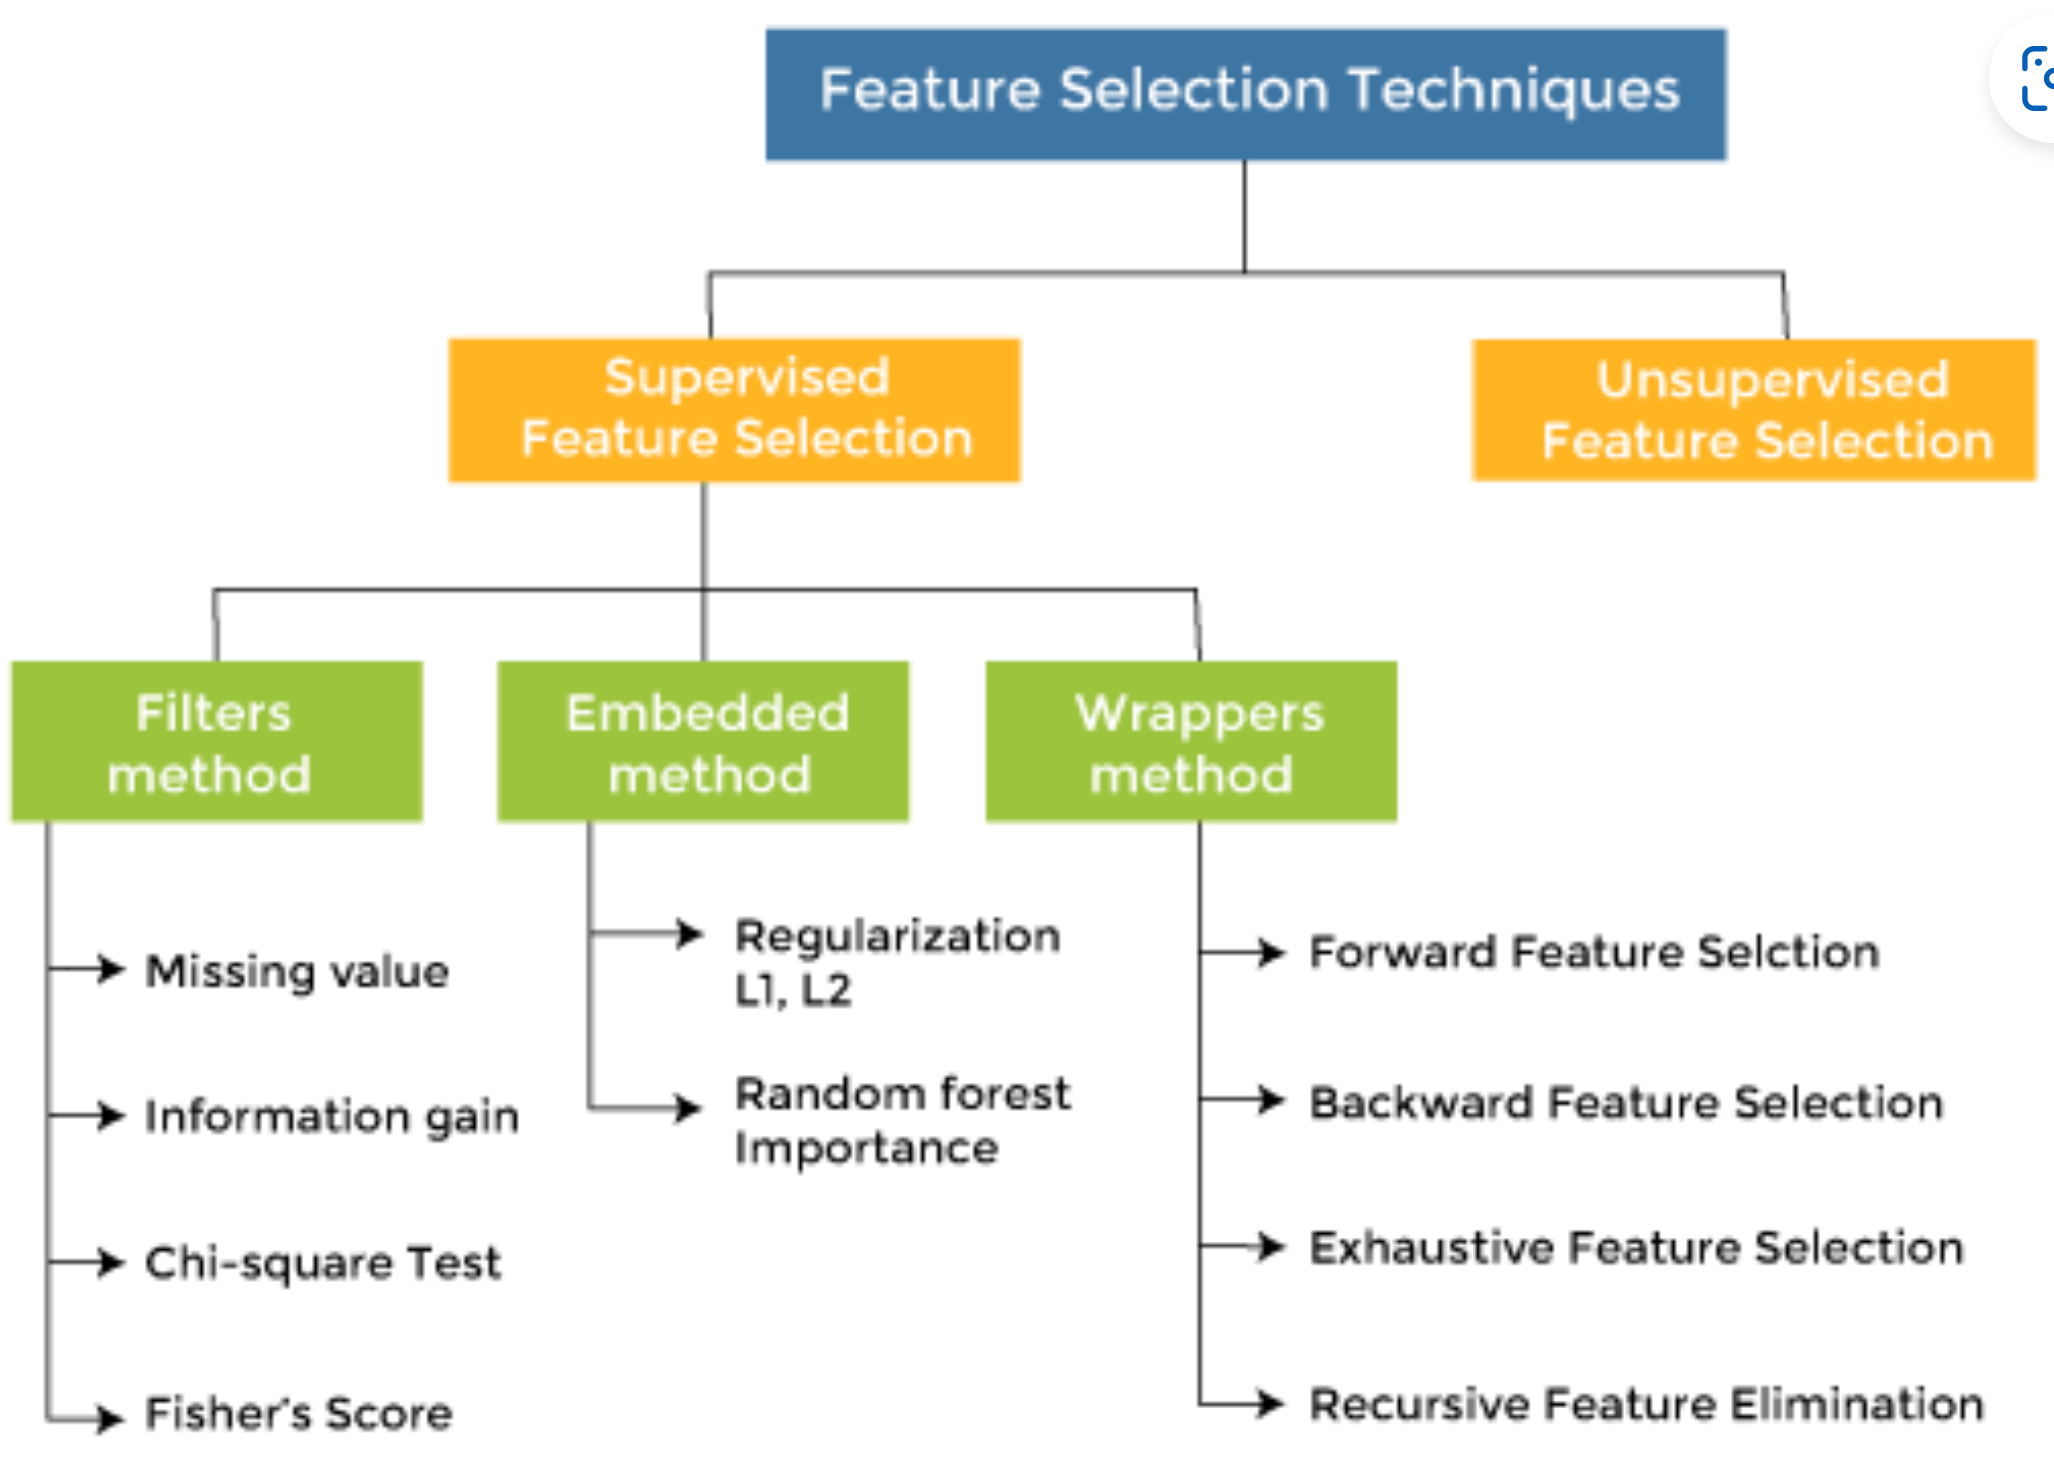

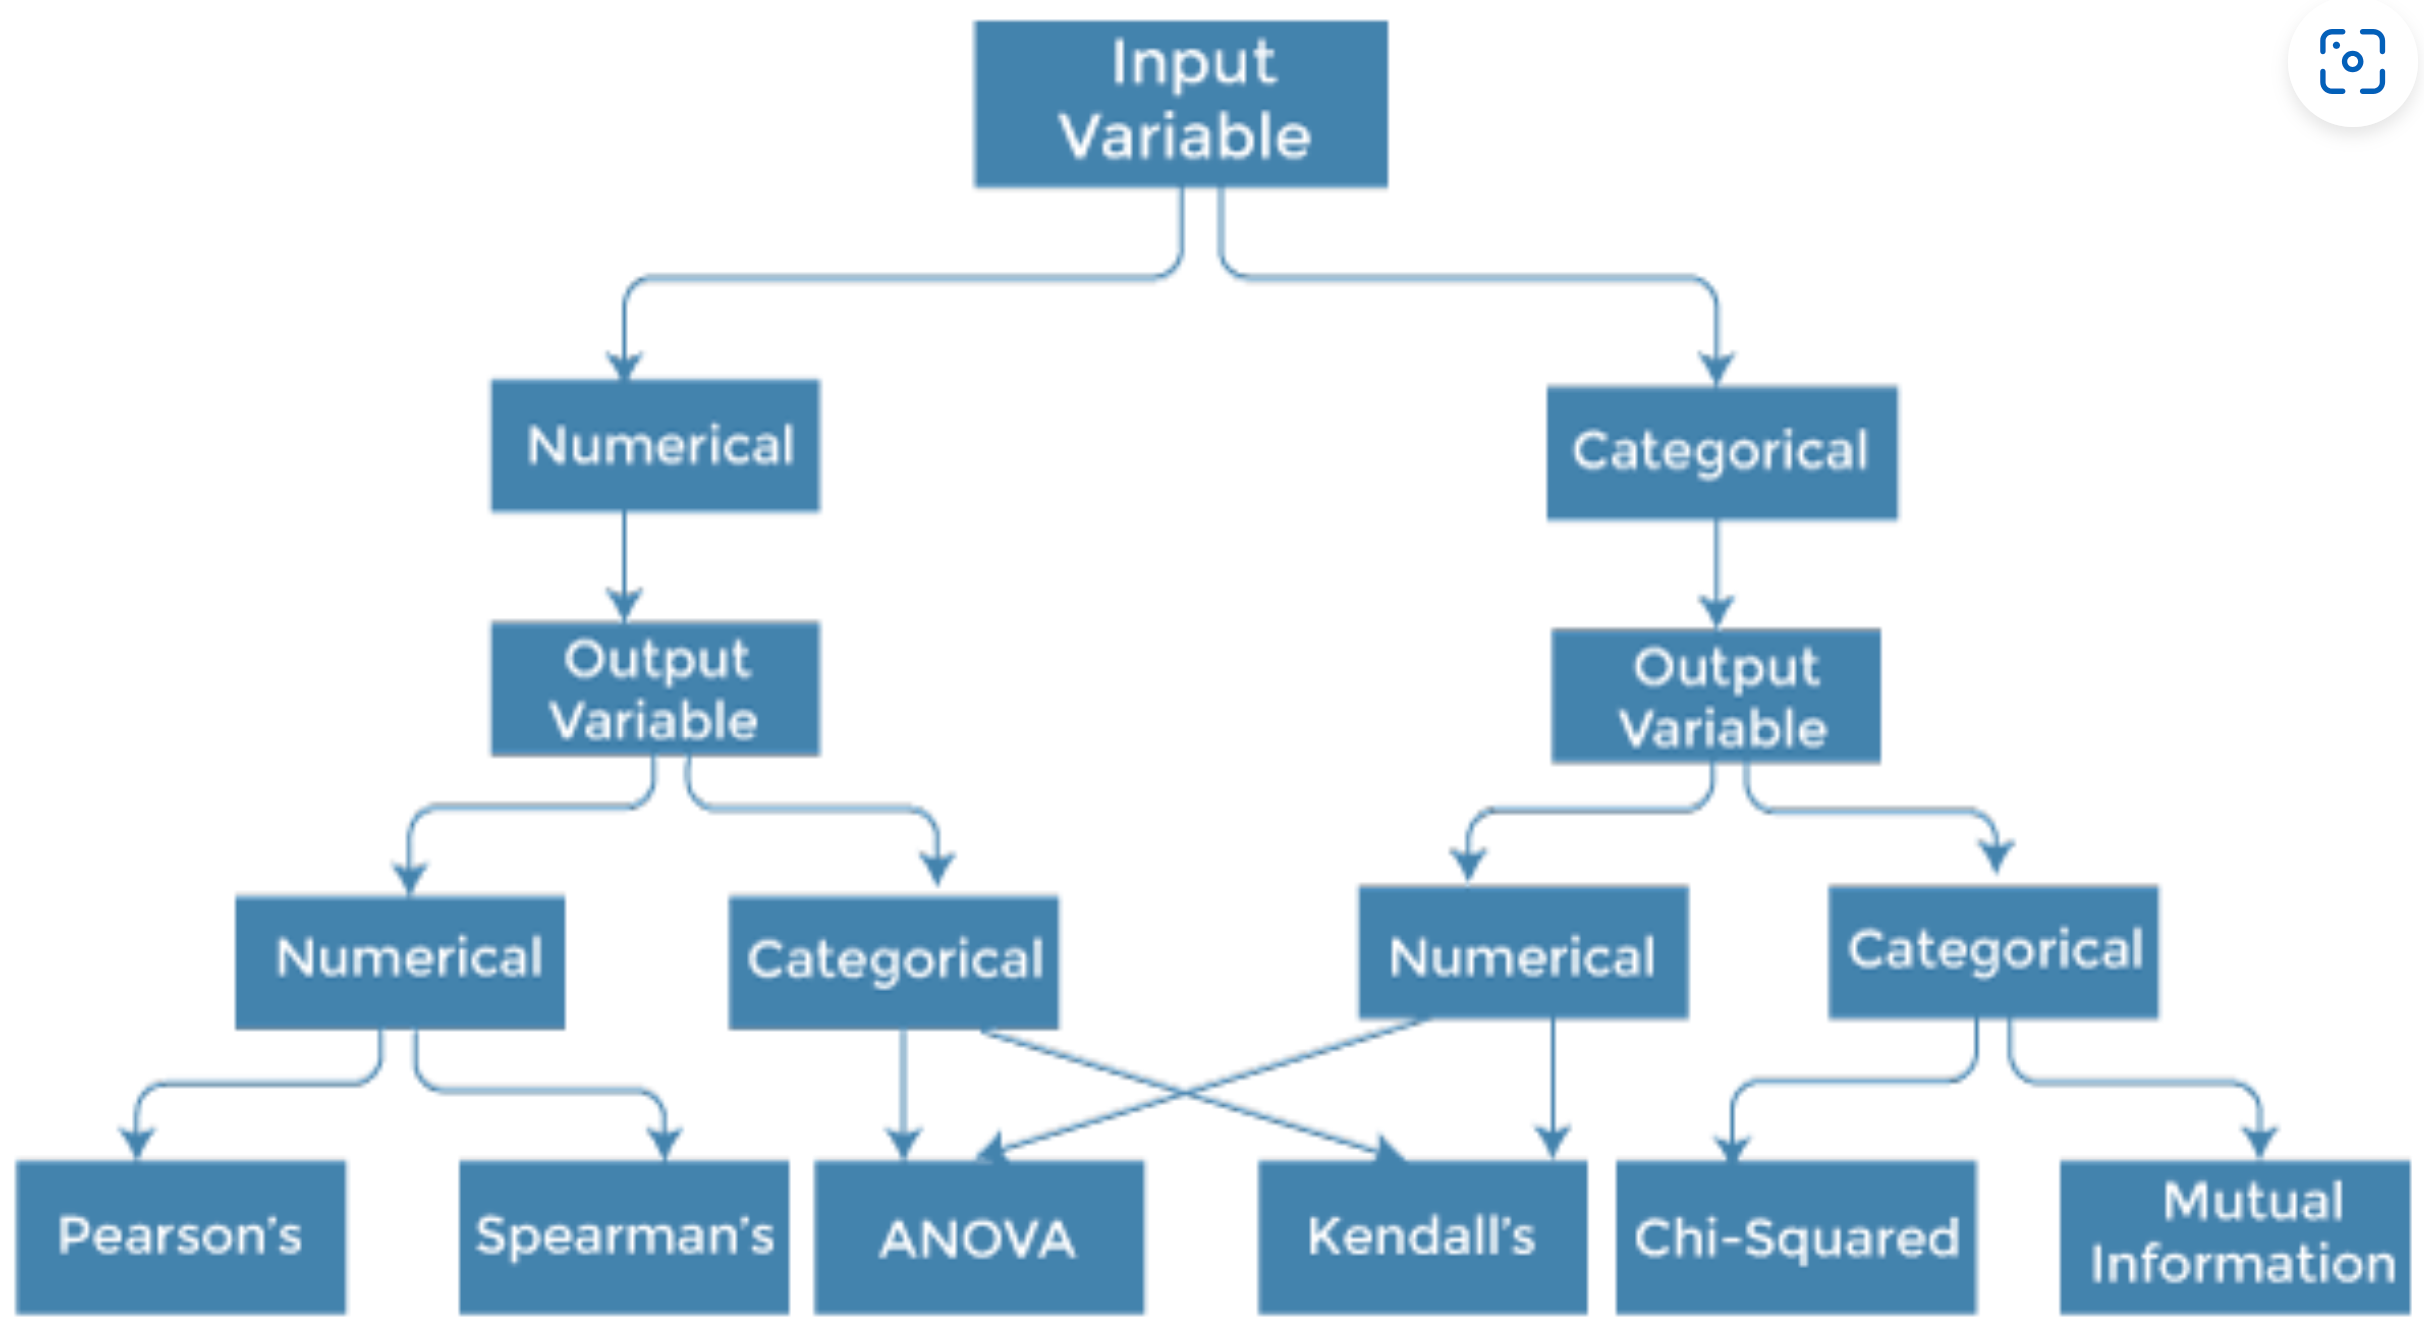
https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

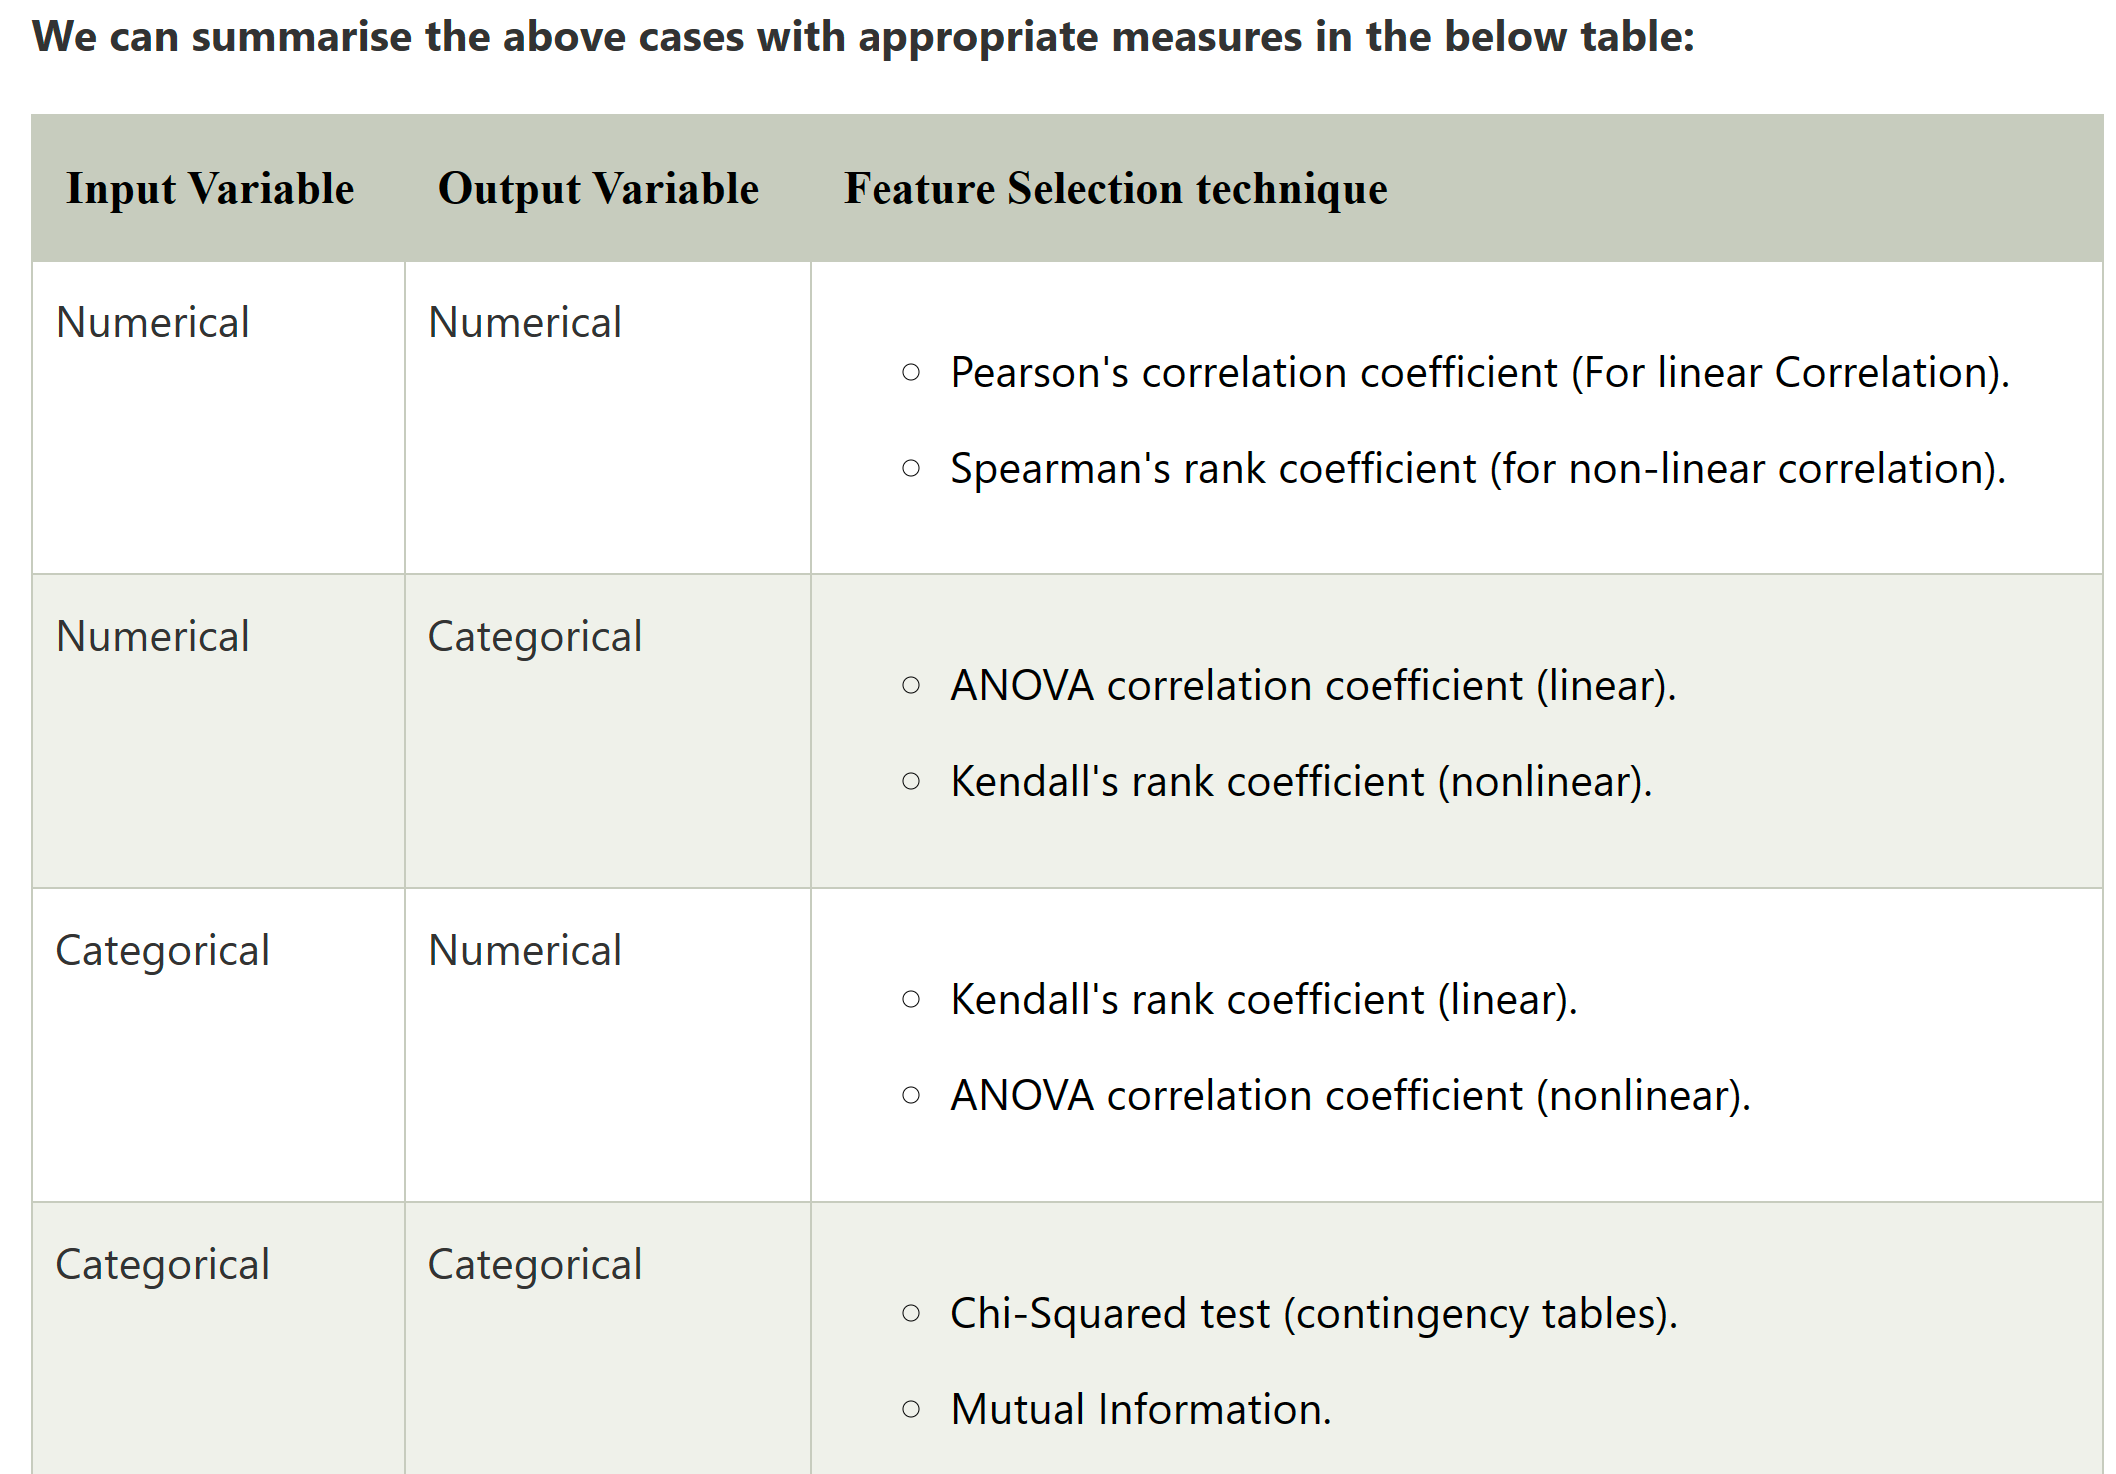

### 8.1 Pearson Correlation Coefficient <a class="anchor" id="8_1PearsonCorrelationCoefficient"></a>

In [30]:
HD2.corr()

HeartDisease   Smoking  AlcoholDrinking  \
HeartDisease                             1.000000  0.104524        -0.036289   
Smoking                                  0.104524  1.000000         0.109183   
AlcoholDrinking                         -0.036289  0.109183         1.000000   
Stroke                                   0.194665  0.058868        -0.022707   
DiffWalking                              0.196420  0.115789        -0.041135   
Sex                                      0.074435  0.087514         0.006824   
PhysicalActivity                        -0.093597 -0.089864         0.024408   
GenHealth                                0.237920  0.164441        -0.039991   
Asthma                                   0.035784  0.017545        -0.007114   
KidneyDisease                            0.142672  0.031890        -0.031166   
SkinCancer                               0.090644  0.030438        -0.008739   
BMI_category                            -0.019059 -0.003553         0.032176   
Nw_Age                                   0.250365  0.100681        -0.068767   
Nw_PhyHealth                             0.166582  0.110872        -0.023348   
Nw_MntHealth                             0.053073  0.057367        -0.005702   
Nw_SleepTime                             0.067415  0.059629         0.004657   
Race_American Indian/Alaskan Native      0.006480  0.034035        -0.005970   
Race_Asian                              -0.032841 -0.064314        -0.024323   
Race_Black                              -0.014517 -0.044215        -0.029654   
Race_Hispanic                           -0.040680 -0.073012        -0.018975   
Race_Other                              -0.006076  0.013278         0.003102   
Race_White                               0.048892  0.083659         0.040372   
Diabetic_No                             -0.165966 -0.048180         0.063882   
Diabetic_No, borderline diabetes         0.013793  0.004426        -0.010214   
Diabetic_Yes                             0.178917  0.052500        -0.063708   
Diabetic_Yes (during pregnancy)         -0.015508 -0.007271        -0.005308   

                                       Stroke  DiffWalking       Sex  \
HeartDisease                         0.194665     0.196420  0.074435   
Smoking                              0.058868     0.115789  0.087514   
AlcoholDrinking                     -0.022707    -0.041135  0.006824   
Stroke                               1.000000     0.170664 -0.001343   
DiffWalking                          0.170664     1.000000 -0.067335   
Sex                                 -0.001343    -0.067335  1.000000   
PhysicalActivity                    -0.074898    -0.271748  0.045309   
GenHealth                            0.164449     0.409798 -0.022366   
Asthma                               0.034942     0.095826 -0.067960   
KidneyDisease                        0.089109     0.149471 -0.007579   
SkinCancer                           0.046039     0.060596  0.015846   
BMI_category                        -0.010637    -0.135610  0.070789   
Nw_Age                               0.146114     0.250104 -0.057843   
Nw_PhyHealth                         0.133815     0.425100 -0.041936   
Nw_MntHealth                         0.032430     0.069459  0.056391   
Nw_SleepTime                         0.069788     0.159146 -0.010236   
Race_American Indian/Alaskan Native  0.012800     0.022220 -0.002520   
Race_Asian                          -0.017760    -0.042431  0.015255   
Race_Black                           0.022010     0.034050 -0.036063   
Race_Hispanic                       -0.028920    -0.014040 -0.001457   
Race_Other                           0.003676     0.004362  0.010701   
Race_White                           0.006864    -0.004359  0.013556   
Diabetic_No                         -0.098923    -0.202817  0.000275   
Diabetic_No, borderline diabetes     0.009484     0.028607 -0.003006   
Diabetic_Yes                         0.105108     0.210911  0.024423   
Diab

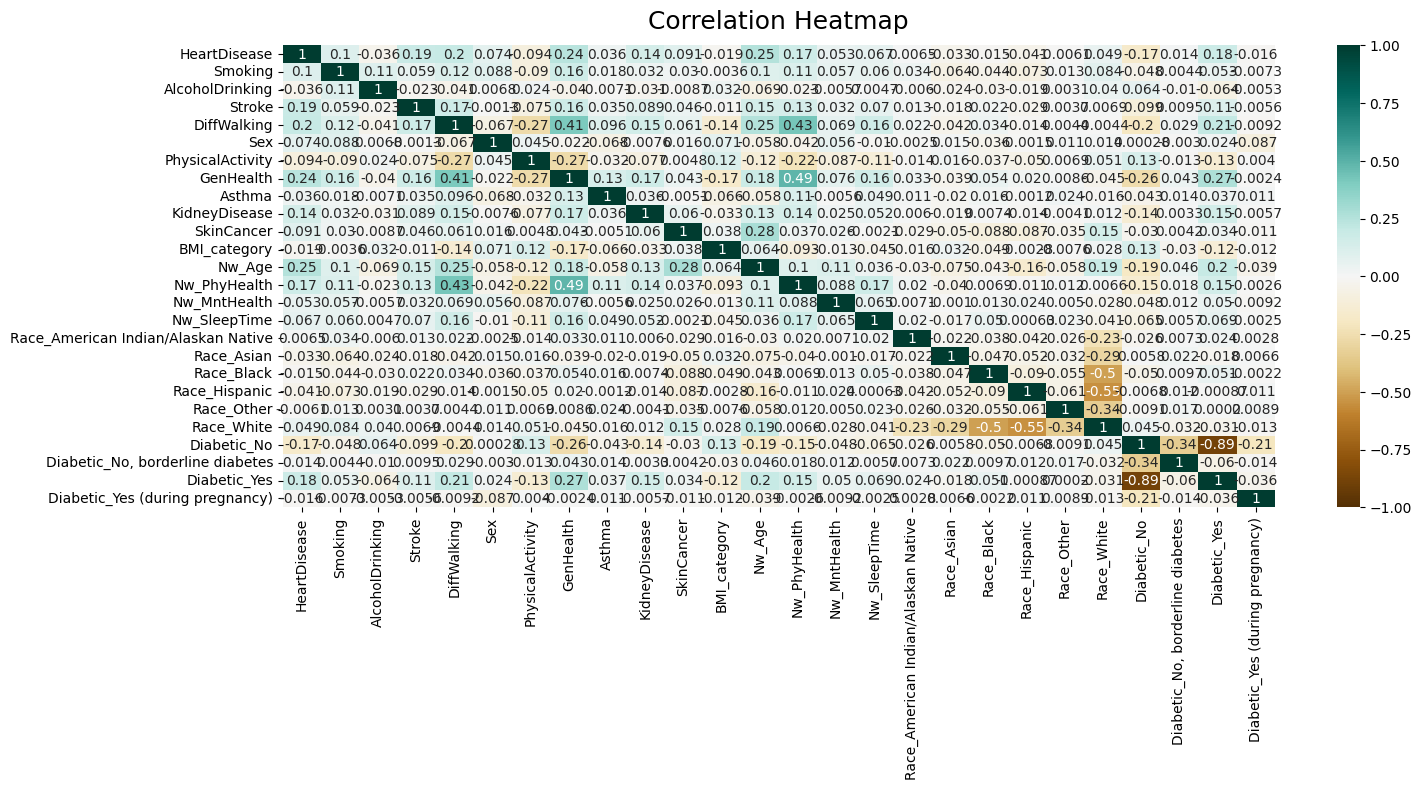

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(HD2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

#### Notes:
The correlation between the features which >= 0.5 or <= -0.5
- There is negative correlation between Diabetic_Yes and Diabetic_No = -0.89
- There is negative correlation between Race_White and Race_Hispanic = -0.55
- There is negative correlation between Race_White and Race_Black = -0.5

In [32]:
HD2.shape

(301717, 26)

#### "HeartDisease" column values are assigned as the label, 
Seprate the label (HeartDisease)

In [88]:
X = HD2.drop(HD2[['HeartDisease']], axis=1)

In [89]:
X.shape

(301717, 25)

In [90]:
y = HD2['HeartDisease']

In [91]:
y.shape

(301717,)

#### Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Selected Features :

Smoking
AlcoholDrinking
Stroke
DiffWalking
Sex
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer
BMI_category
Nw_Age
Nw_PhyHealth
Nw_MntHealth
Nw_SleepTime
Race_American Indian/Alaskan Native
Race_Asian
Race_Black
Race_Hispanic
Race_Other
Race_White
Diabetic_No
Diabetic_No, borderline diabetes
Diabetic_Yes
Diabetic_Yes (during pregnancy)


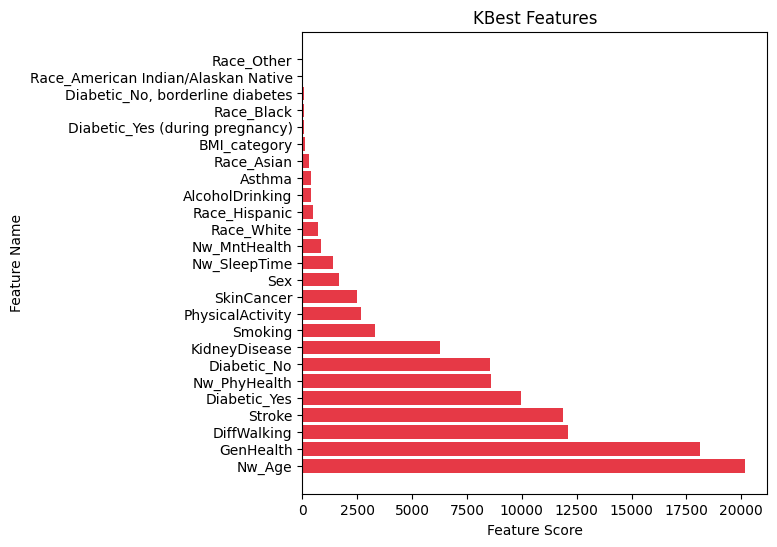

In [99]:
skb=SelectKBest(f_classif,k=25)
KBest_features=skb.fit(X,y)

mask=KBest_features.get_support(True)

names=[]

print('Selected Features :\n')

for i in mask:
    print(X.columns[i])
    names.append(X.columns[i])

scores = skb.scores_
named_scores = zip(names,scores)
sorted_named_scores = sorted(named_scores, key=lambda z: z[1], reverse=True)

sorted_scores=[score[1] for score in sorted_named_scores]
sorted_names=[name[0] for name in sorted_named_scores]

y_pos=np.arange(len(names)) 
plt.figure(figsize=(6,6))

plt.barh(y_pos, sorted_scores, height=0.8, align='center', tick_label=sorted_names, color='#E63946')
plt.yticks(y_pos)
plt.xlabel('Feature Score')
plt.ylabel('Feature Name')
plt.title('KBest Features');

### 8.2 Baseline model <a class="anchor" id="8_2Baselinemodel"></a>

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

print('Logistic Regression', lr.score(X_test, y_test))
print('Decision Tree', dt.score(X_test, y_test))

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 0.9117177378046943
Decision Tree 0.8742655699177438


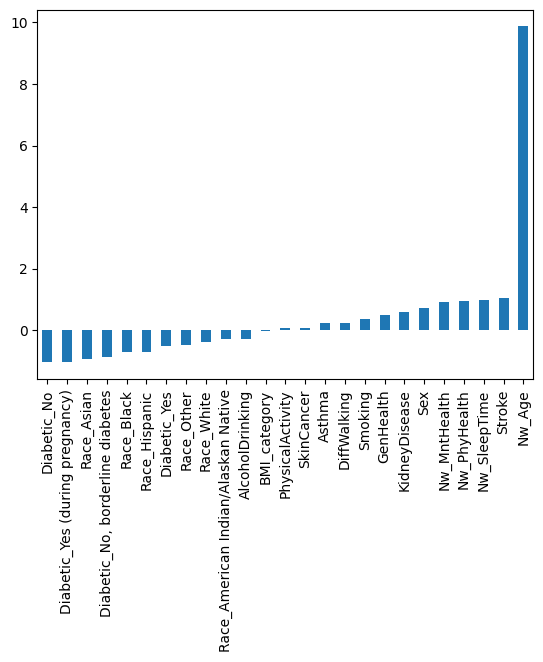

In [105]:
pd.Series(lr.coef_[0], index=X.columns).sort_values().plot(kind='bar');

### 8.3 Scaling <a class="anchor" id="8_3Scaling"></a>

In [108]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [118]:
scaler = MinMaxScaler()

scaler.fit(HD2)
scaled = scaler.transform(HD2)
scaled_HD2 = pd.DataFrame(scaled, columns=HD2.columns)

#print(scaled_HD2)

In [122]:
X1 = HD2.drop(scaled_HD2[['HeartDisease']], axis=1)
y1 = scaled_HD2['HeartDisease']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

lr1 = LogisticRegression()
dt1 = DecisionTreeClassifier()

lr1.fit(X1_train, y1_train)
dt1.fit(X1_train, y1_train)

print('Logistic Regression', lr.score(X1_test, y1_test))
print('Decision Tree', dt.score(X1_test, y1_test))

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 0.9117177378046943
Decision Tree 0.8739140478270913


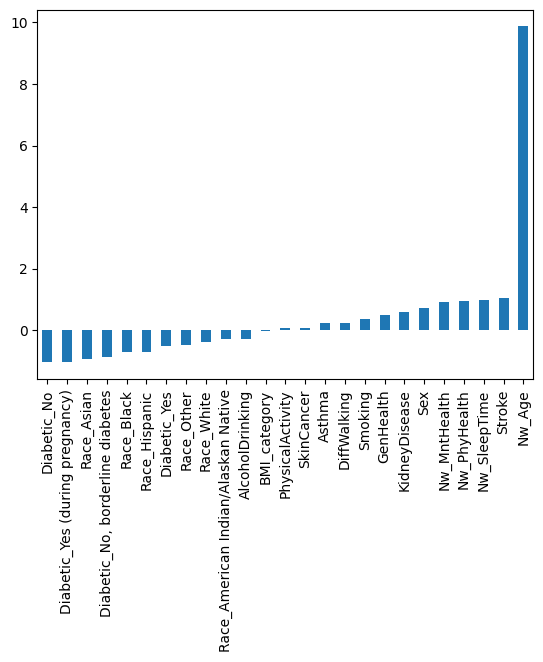

In [123]:
pd.Series(lr1.coef_[0], index=X1.columns).sort_values().plot(kind='bar');

### Notes:
- Before scaling, the scores
    - Logistic Regression 0.9117177378046943
    - Decision Tree 0.8742655699177438
- After scaling, , the scores
    - Logistic Regression 0.9117177378046943
    - Decision Tree 0.8739140478270913
- For the plot before and after are still the same plot percentage.

### Dropping correlated features ('Race_Hispanic', 'Race_Black', 'Diabetic_No')

In [ ]:
Notes:
The correlation between the features which >= 0.5 or <= -0.5

There is negative correlation between Diabetic_Yes and Diabetic_No = -0.89
There is negative correlation between Race_White and Race_Hispanic = -0.55
There is negative correlation between Race_White and Race_Black = -0.5

In [126]:
X2 = HD2.drop(HD2[['HeartDisease', 'Race_Hispanic', 'Race_Black', 'Diabetic_No']], axis=1)
y2 = HD2['HeartDisease']

In [127]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

lr = LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X2_train, y2_train)
dt.fit(X2_train, y2_train)

print('Logistic Regression', lr.score(X2_test, y2_test))
print('Decision Tree', dt.score(X2_test, y2_test))

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 0.9117679552462161
Decision Tree 0.8749786575873533


### Note:
After dropping these correlated features ('Race_Hispanic', 'Race_Black', 'Diabetic_No'), the scores become little better.

### 8.4 PCA <a class="anchor" id="8_4PCA"></a>
Principal Component Analysis

Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize.
- Advantages
    - Visualization, Reduce coorelation,  aka noise, Maintain less features, Faster
- Disadvantages
    - Can't analyse features anymore, Adds complexity to explainability

In [128]:
from sklearn.decomposition import PCA
pca = PCA()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_pca = pca.fit_transform(X)

In [129]:
X.shape

(301717, 25)

In [130]:
X.head()

Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  PhysicalActivity  \
0        1                0       0            0    0                 1   
1        0                0       1            0    0                 1   
2        1                0       0            0    1                 1   
3        0                0       0            0    0                 0   
4        0                0       0            1    0                 1   

   GenHealth  Asthma  KidneyDisease  SkinCancer  ...  \
0          1       1              0           1  ...   
1          1       0              0           0  ...   
2          3       1              0           0  ...   
3          2       0              0           1  ...   
4          1       0              0           0  ...   

   Race_American Indian/Alaskan Native  Race_Asian  Race_Black  Race_Hispanic  \
0                                    0           0           0              0   
1                                    0           0           0              0   
2                                    0           0           0              0   
3                                    0           0           0              0   
4                                    0           0           0              0   

   Race_Other  Race_White  Diabetic_No  Diabetic_No, borderline diabetes  \
0           0           1            0                                 0   
1           0           1            1                                 0   
2           0           1            0                                 0   
3           0           1            1                                 0   
4           0           1            1                                 0   

   Diabetic_Yes  Diabetic_Yes (during pregnancy)  
0             1                                0  
1             0                                0  
2             1                                0  
3             0                                0  
4             0                                0  

[5 rows x 25 columns]

In [131]:
X_pca

array([[ 1.99611217e+00,  2.06754691e+00, -4.03449424e-01, ...,
        -2.18919360e-02, -4.13403369e-15, -1.45705504e-14],
       [-4.78342041e-01,  2.86497281e-01,  3.81883479e-01, ...,
        -5.79635680e-03,  5.69686907e-15, -4.62458280e-14],
       [ 2.74593154e-01, -2.05157644e+00, -6.43243615e-01, ...,
        -1.85501368e-02,  7.57507254e-15, -5.41690160e-14],
       ...,
       [ 1.61706861e-01, -4.15071667e-01,  1.04767612e+00, ...,
        -7.51577791e-03, -3.95355280e-17,  3.62925656e-17],
       [ 1.00581322e+00,  1.80195399e-01,  1.03343064e+00, ...,
         1.98953877e-03,  4.49358075e-17,  6.98117306e-18],
       [ 1.64345797e+00,  9.17858647e-01,  9.53226126e-01, ...,
        -3.04721547e-03,  1.50239120e-17,  5.24003684e-17]])

In [132]:
X_pca.shape

(301717, 25)

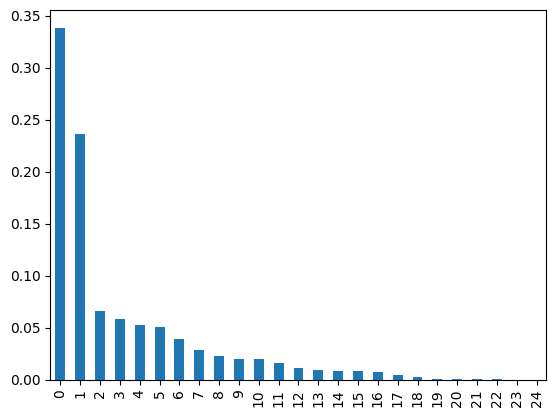

In [133]:
pd.Series(pca.explained_variance_ratio_).plot(kind='bar');

In [136]:
pd.Series(pca.explained_variance_ratio_.cumsum()).head(25)

0     0.338678
1     0.574661
2     0.640692
3     0.699206
4     0.751937
5     0.802818
6     0.841991
7     0.870469
8     0.893328
9     0.913429
10    0.932740
11    0.948216
12    0.959191
13    0.968189
14    0.976481
15    0.984409
16    0.991468
17    0.996016
18    0.998539
19    0.999484
20    0.999861
21    0.999946
22    1.000000
23    1.000000
24    1.000000
dtype: float64

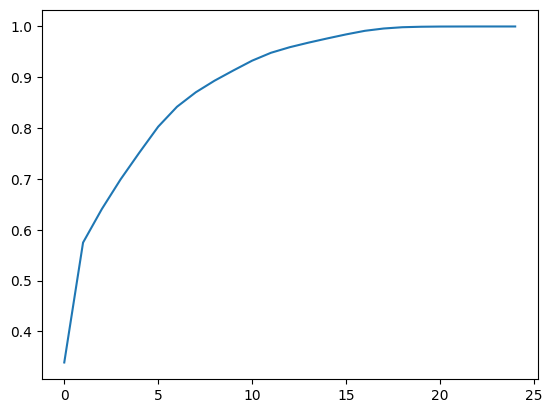

In [137]:
pd.Series(pca.explained_variance_ratio_.cumsum()).plot(kind='line');

### Note:
Will reach to excellent score at feature number 16

In [142]:
# decimal for how much explained variance you want to maintain

pca = PCA(.99)

X_pca = pca.fit_transform(X)

X_pca.shape

(301717, 17)

### 2d Visualization

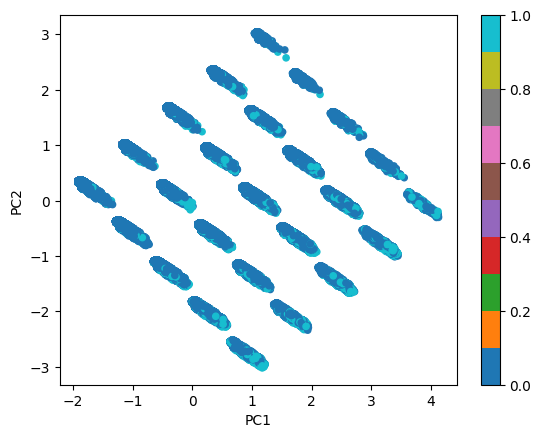

In [143]:
pca = PCA(2)

X_pca = pca.fit_transform(X)

pd.DataFrame(X_pca, columns=['PC1','PC2']).plot(kind='scatter',
                                                x='PC1',
                                                y='PC2', 
                                                c=y, 
                                                colormap='tab10');

First, consider a dataset in only two dimensions, like (height, weight). This dataset can be plotted as points in a plane. But if we want to tease out variation, PCA finds a new coordinate system in which every point has a new (x,y) value. The axes don't actually mean anything physical; they're combinations of height and weight called "principal components" that are chosen to give one axes lots of variation.

#### What if I didn't know the labels....
Using KMeans clustering to add labels

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


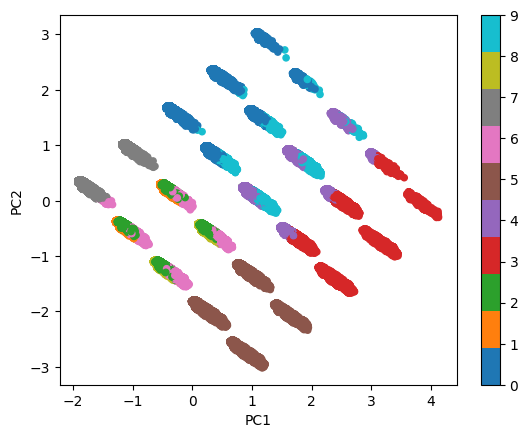

In [144]:
from sklearn.cluster import KMeans

# estimators (fit, predict)
model = KMeans(10)

clusters = model.fit_predict(X)

# transformers (standardscaler, OHE, countvectorizer: fit, transform)
pca = PCA(2)

X_pca = pca.fit_transform(X)

pd.DataFrame(X_pca, columns=['PC1','PC2']).plot(kind='scatter',
                                                x='PC1',
                                                y='PC2', 
                                                c=clusters, 
                                                colormap='tab10');

C:\Users\alhai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


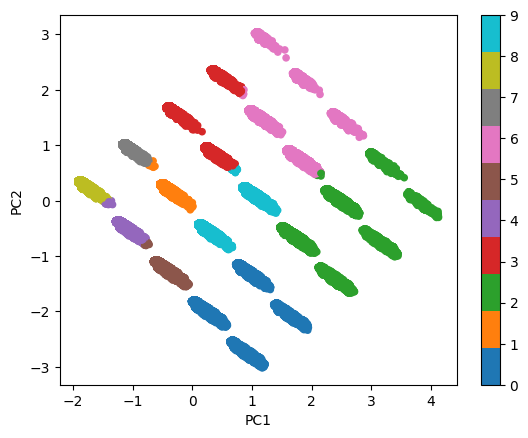

In [145]:
# another tool - do the PCA first and then do KMEANS

pca = PCA(2)

X_pca = pca.fit_transform(X)

model = KMeans(10)
clusters = model.fit_predict(X_pca)

pd.DataFrame(X_pca, columns=['PC1','PC2']).plot(kind='scatter',
                                                x='PC1',
                                                y='PC2', 
                                                c=clusters, 
                                                colormap='tab10');

## __Please look at ( Part 1 and Part 3) files__

Part 1- Heart Disease Prediction_Data Analysis:

http://localhost:8888/notebooks/Am_October_Portfolio/Heart%20Disease%20Prediction%20Factors/Part%201-%20Heart%20Disease%20Prediction_Data%20Analysis.ipynb